In [46]:
import pandas as pd

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
from os import path
path="/content/drive/MyDrive/MachineLearningPraktikum/Praktikum7/data"

In [49]:
from os import path
path="/content/drive/MyDrive/MachineLearningPraktikum/Praktikum7/data"

In [50]:
df = pd.read_csv(path + "/apples_and_oranges.csv")
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [52]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [53]:
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [54]:
df['Class'].value_counts()

,count
Class,
orange,20
apple,20


In [55]:
x = df[['Weight', 'Size']]

# Kolom target (label)
y = df['Class']

In [56]:
x.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [57]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [58]:
# 1. MEMUAT DAN MEMPERSIAPKAN DATA
# Memuat data
df = pd.read_csv(path + '/apples_and_oranges.csv')

# Menampilkan pemetaan kelas untuk interpretasi
# LabelEncoder secara otomatis menetapkan 0 dan 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class_Encoded'] = le.fit_transform(df['Class'])
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# Misalnya: {'apple': 0, 'orange': 1}
print(f"Pemetaan Kelas: {class_mapping}")

# Menentukan Fitur (X) dan Target (y)
X = df[['Weight', 'Size']]
y = df['Class_Encoded']

Pemetaan Kelas: {'apple': np.int64(0), 'orange': np.int64(1)}


In [59]:
# 2. MEMBAGI DATASET
# ----------------------------------------------------------------------

# Membagi data menjadi set pelatihan (80%) dan pengujian (20%)
# random_state=42 memastikan hasil yang sama setiap kali kode dijalankan
# stratify=y memastikan proporsi Apel dan Jeruk sama di kedua set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [60]:
# 3. MEMBANGUN DAN MELATIH MODEL SVM
# ----------------------------------------------------------------------

model = SVC(kernel='linear', random_state=42)

# Melatih model menggunakan data pelatihan
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [61]:
# 4. EVALUASI MODEL

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

# Menampilkan hasil evaluasi
print("\n" + "="*40)
print("HASIL EVALUASI MODEL SVM")
print("="*40)
print(f"Akurasi Model: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report (Precision, Recall, F1-Score):")
print(class_report)


HASIL EVALUASI MODEL SVM
Akurasi Model: 100.00%

Confusion Matrix:
[[4 0]
 [0 4]]

Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



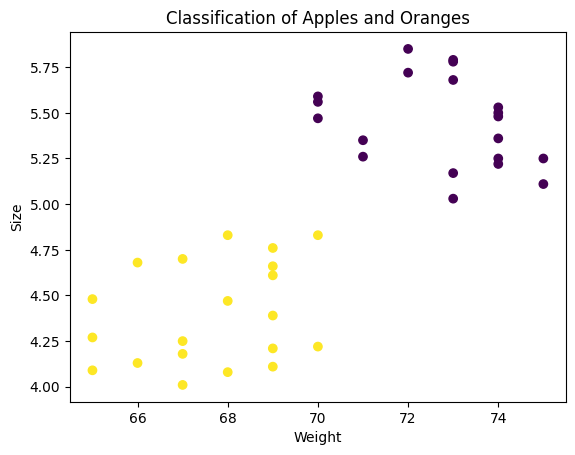

In [62]:
import matplotlib.pyplot as plt

plt.scatter(df['Weight'], df['Size'], c=df['Class_Encoded'])
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Classification of Apples and Oranges')
plt.show()